In [10]:
from sklearn.model_selection import train_test_split
X=heart.drop(['num'],axis=1)
y=heart['num']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
train_data=X_train.join(y_train)
train_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
185,186,63,Female,Cleveland,atypical angina,140.0,195.0,False,normal,179.0,False,0.0,upsloping,2.0,normal,0
187,188,66,Male,Cleveland,atypical angina,160.0,246.0,False,normal,120.0,True,0.0,flat,3.0,fixed defect,2
147,148,41,Male,Cleveland,non-anginal,112.0,250.0,False,normal,179.0,False,0.0,upsloping,0.0,normal,0
30,31,69,Female,Cleveland,typical angina,140.0,239.0,False,normal,151.0,False,1.8,upsloping,2.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,191,50,Male,Cleveland,non-anginal,129.0,196.0,False,normal,163.0,False,0.0,upsloping,0.0,normal,0
71,72,67,Male,Cleveland,asymptomatic,125.0,254.0,True,normal,163.0,False,0.2,flat,2.0,reversable defect,3
107,108,57,Male,Cleveland,non-anginal,128.0,229.0,False,lv hypertrophy,150.0,False,0.4,flat,1.0,reversable defect,1
274,275,59,Male,Cleveland,typical angina,134.0,204.0,False,normal,162.0,False,0.8,upsloping,2.0,normal,1


$Logistic Regression Baseline$

Training the Logistic Regression model...
Making predictions on the test set...

--- Model Evaluation ---
Accuracy: 0.6500

Confusion Matrix:


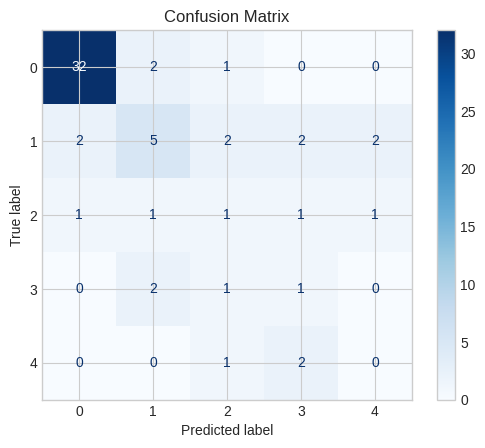


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        35
           1       0.50      0.38      0.43        13
           2       0.17      0.20      0.18         5
           3       0.17      0.25      0.20         4
           4       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.35      0.35      0.35        60
weighted avg       0.67      0.65      0.66        60



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
lr_model_start = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

# 2. Train the model on the training data
print("Training the Logistic Regression model...")
lr_model_start.fit(X_train, y_train)

# 3. Make predictions on the test data
print("Making predictions on the test set...")
y_pred = lr_model_start.predict(X_test)
y_pred_proba = lr_model_start.predict_proba(X_test)[:, 1] # Probability for the positive class

# 4. Evaluate the model using classification metrics
print("\n--- Model Evaluation ---")

# a. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# b. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_start.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# c. Classification Report (combines precision, recall, f1-score)
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



$SVM$

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the SVM model...
Making predictions on the test set...

--- Model Evaluation ---
Accuracy: 0.5833

Confusion Matrix:


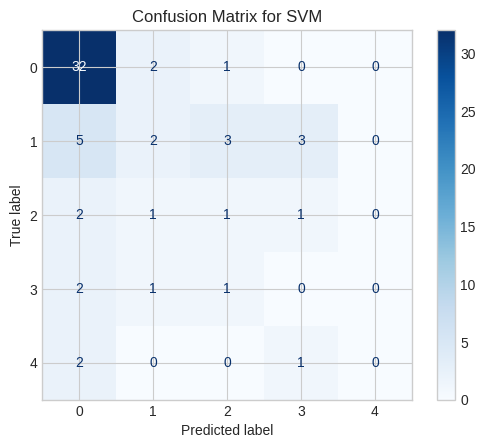


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.33      0.15      0.21        13
           2       0.17      0.20      0.18         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.25      0.25      0.24        60
weighted avg       0.52      0.58      0.54        60



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# 2. Train the model on the training data
print("Training the SVM model...")
svm_model.fit(X_train_scaled, y_train)

# 3. Make predictions on the test data
print("Making predictions on the test set...")
y_pred = svm_model.predict(X_test_scaled)

# 4. Evaluate the model using classification metrics
print("\n--- Model Evaluation ---")

# a. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



# b. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.show()

# c. Classification Report (combines precision, recall, f1-score)
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

$Random Forest$


--- Multi-Class Model Evaluation ---
Accuracy: 0.6000

Confusion Matrix:


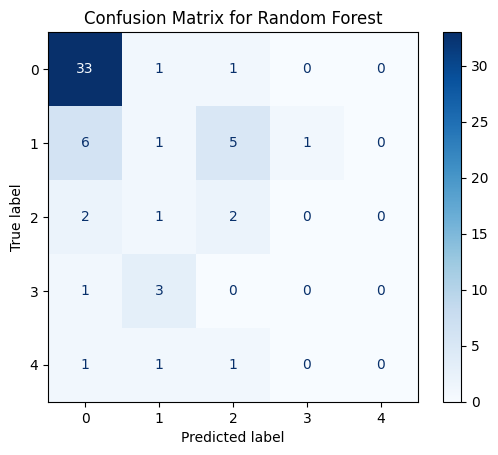


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.94      0.85        35
     Class 1       0.14      0.08      0.10        13
     Class 2       0.22      0.40      0.29         5
     Class 3       0.00      0.00      0.00         4
     Class 4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.23      0.28      0.25        60
weighted avg       0.50      0.60      0.54        60



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# 1. Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# 2. Make predictions on the scaled test data
y_pred = rf_model.predict(X_test_scaled)

# 3. Evaluate the model using multi-class metrics
print("\n--- Multi-Class Model Evaluation ---")

# a. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# b. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()

# c. Classification Report (most comprehensive for multi-class)
print("\nClassification Report:")
# The 'target_names' parameter helps with interpreting the report
target_names = [f'Class {i}' for i in np.unique(y)]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

In [ ]:
import xgboost as xgb

# Initialize the XGBoost classifier
# The 'objective' parameter is for multi-class classification
xgb_model = xgb.XGBClassifier(objective='multi:softmax',
                                 num_class=len(np.unique(y_train)), # Number of unique classes
                                 eval_metric='mlogloss',
                                 use_label_encoder=False,
                                 random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import classification_report
print("\n--- XGBoost Classification Report ---")
target_names = [f'Class {i}' for i in np.unique(y_train)]
print(classification_report(y_test, y_pred_xgb, target_names=target_names, zero_division=0))


--- XGBoost Classification Report ---
              precision    recall  f1-score   support

     Class 0       0.86      0.89      0.87        35
     Class 1       0.18      0.15      0.17        13
     Class 2       0.33      0.40      0.36         5
     Class 3       0.17      0.25      0.20         4
     Class 4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.31      0.34      0.32        60
weighted avg       0.58      0.60      0.59        60



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:46:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Applying PCA


Original dimensions: X_train.shape = (239, 25)
Transformed dimensions: X_train_pca.shape = (239, 2)

Explained variance ratio by each principal component: [0.18911451 0.1057843 ]
Total explained variance by the components: 0.2949

Training Logistic Regression model on PCA-transformed data...

--- Final Evaluation on PCA-Transformed Data ---
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        35
           1       0.29      0.15      0.20        13
           2       0.00      0.00      0.00         5
           3       0.17      0.50      0.25         4
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.25      0.31      0.26        60
weighted avg       0.54      0.60      0.56        60


Plotting explained variance to find optimal number of components...


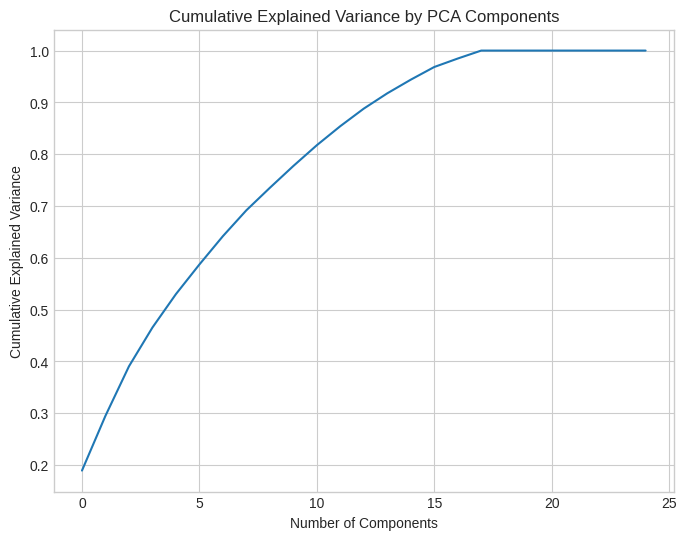

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA on the scaled training data

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

#  Transform the test data using the SAME PCA object
X_test_pca = pca.transform(X_test_scaled)

print(f"\nOriginal dimensions: X_train.shape = {X_train.shape}")
print(f"Transformed dimensions: X_train_pca.shape = {X_train_pca.shape}")
print(f"\nExplained variance ratio by each principal component: {pca.explained_variance_ratio_}")
print(f"Total explained variance by the components: {np.sum(pca.explained_variance_ratio_):.4f}")

# Train a new model on the PCA-transformed data
print("\nTraining Logistic Regression model on PCA-transformed data...")
pca_model = LogisticRegression(random_state=42, solver='saga', max_iter=1000)
pca_model.fit(X_train_pca, y_train)

#  Evaluate the model
y_pred_pca = pca_model.predict(X_test_pca)
print("\n--- Final Evaluation on PCA-Transformed Data ---")
print(classification_report(y_test, y_pred_pca, zero_division=0))


print("\nPlotting explained variance to find optimal number of components...")
pca_full = PCA(n_components=None)
pca_full.fit(X_train_scaled)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

Decision Tree

Initializing and training a DecisionTreeClassifier...

--- Model Evaluation ---
Decision Tree training score: 0.5188
Decision Tree test score: 0.4333

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.63      0.75        35
     Class 1       0.17      0.08      0.11        13
     Class 2       0.10      0.40      0.16         5
     Class 3       0.14      0.25      0.18         4
     Class 4       0.00      0.00      0.00         3

    accuracy                           0.43        60
   macro avg       0.27      0.27      0.24        60
weighted avg       0.59      0.43      0.48        60


Confusion Matrix:


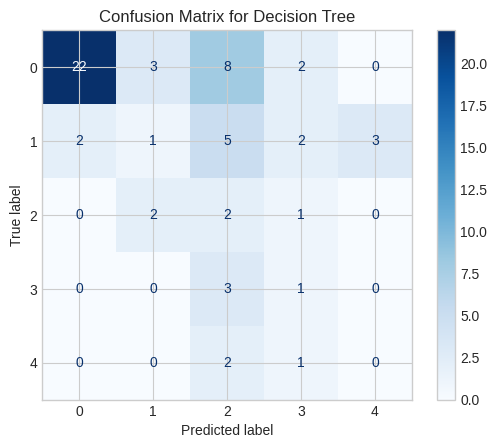


Visualizing the trained Decision Tree...


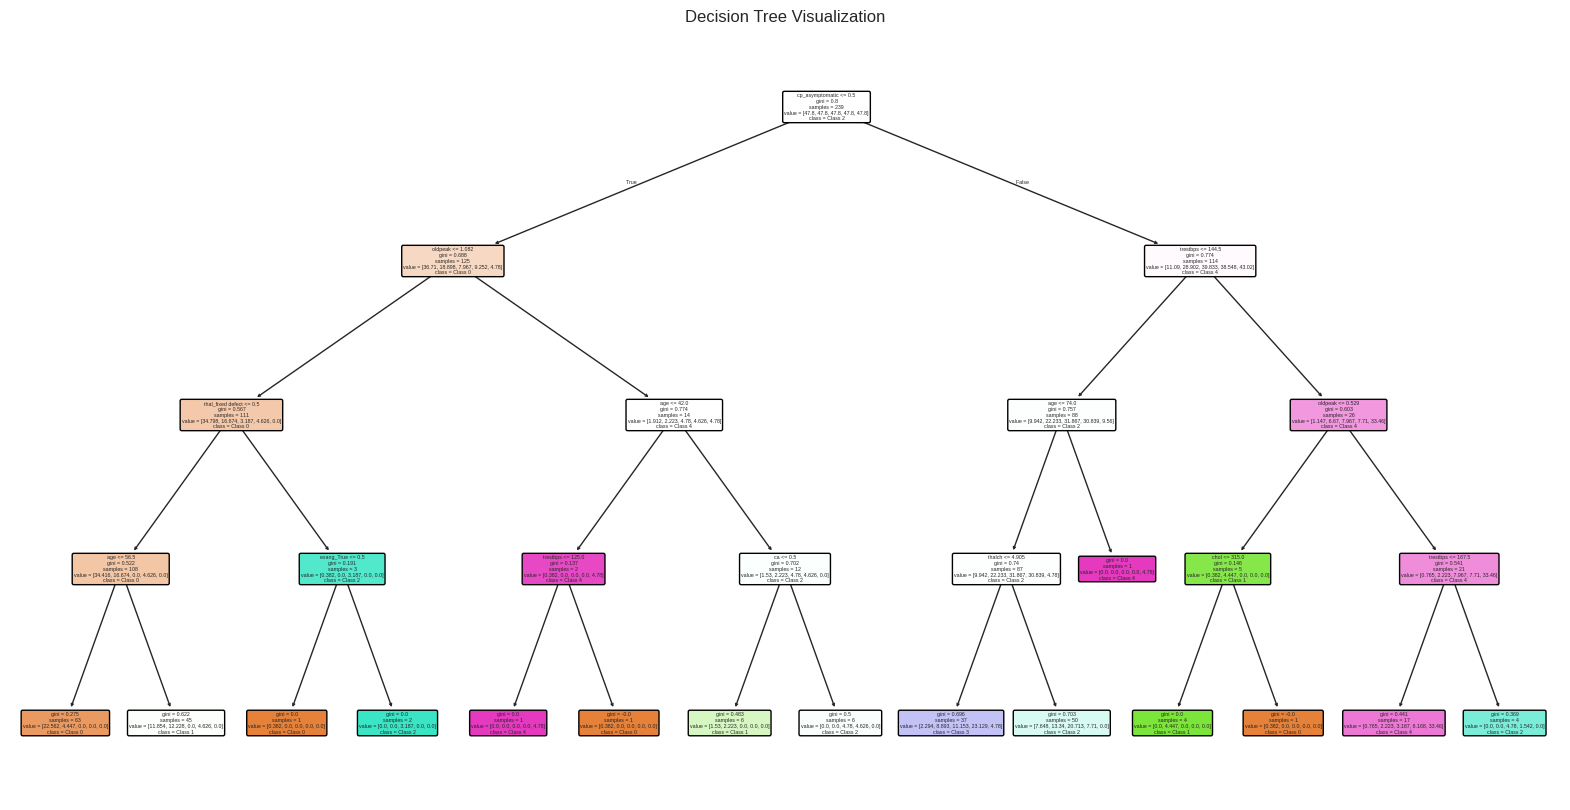

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
print("Initializing and training a DecisionTreeClassifier...")
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced')

# Train the model on the training data
dt_model.fit(X_train, y_train)

#  Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model using classification metrics
print("\n--- Model Evaluation ---")
print(f"Decision Tree training score: {dt_model.score(X_train, y_train):.4f}")
print(f"Decision Tree test score: {dt_model.score(X_test, y_test):.4f}")

# a. Classification Report 
print("\nClassification Report:")
target_names = [f'Class {i}' for i in np.unique(y)]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

# b. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree')
plt.show()

#  Visualize the Decision Tree 
print("\nVisualizing the trained Decision Tree...")
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=target_names, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

Improved RF PCA model


--- Multi-Class Model Evaluation ---
Accuracy: 0.6500

Confusion Matrix:


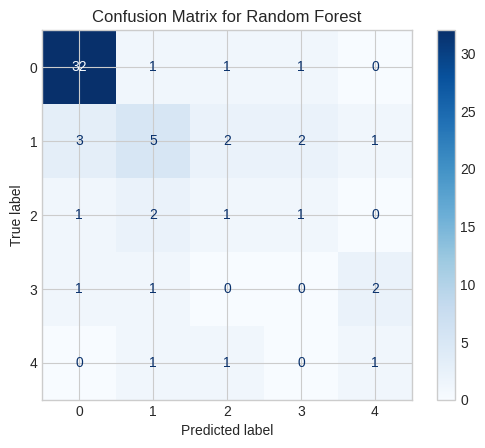


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.91      0.89        35
     Class 1       0.50      0.38      0.43        13
     Class 2       0.20      0.20      0.20         5
     Class 3       0.00      0.00      0.00         4
     Class 4       0.25      0.33      0.29         3

    accuracy                           0.65        60
   macro avg       0.36      0.37      0.36        60
weighted avg       0.64      0.65      0.64        60



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

#  Train the model on the scaled training data
rf_model_pca.fit(X_train_pca, y_train)

#  Make predictions on the scaled test data
y_pred = rf_model_pca.predict(X_test_pca)

#  Evaluate the model using multi-class metrics
print("\n--- Multi-Class Model Evaluation ---")

# a. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# b. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()

# c. Classification Report 
print("\nClassification Report:")
# The 'target_names' parameter helps with interpreting the report
target_names = [f'Class {i}' for i in np.unique(y)]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

Improved SVM

Training the SVM model...
Making predictions on the test set...

--- Model Evaluation ---
Accuracy: 0.5667

Confusion Matrix:


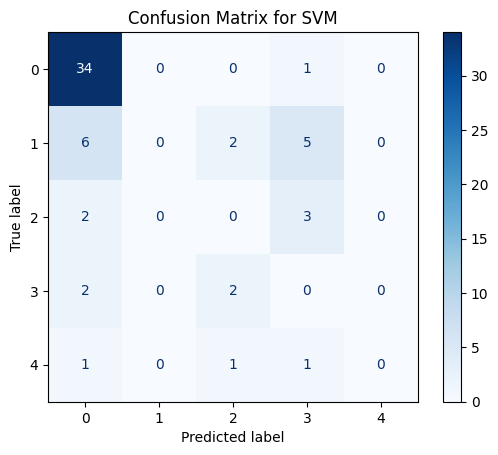


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.57        60
   macro avg       0.15      0.19      0.17        60
weighted avg       0.44      0.57      0.50        60



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# 2. Train the model on the training data
print("Training the SVM model...")
svm_model.fit(X_train_pca, y_train)

# 3. Make predictions on the test data
print("Making predictions on the test set...")
y_pred = svm_model.predict(X_test_pca)

# 4. Evaluate the model using classification metrics
print("\n--- Model Evaluation ---")

# a. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



# b. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.show()

# c. Classification Report (combines precision, recall, f1-score)
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))